In [9]:
!pip3 install -q --upgrade ipython keras
!pip3 install -q --upgrade ipykernel pillow
!pip3 install -q --upgrade imgaug
!ls -la chest_Xray

total 36
drwxrwxr-x 5 wkyubi wkyubi  4096 mars  16 15:08 .
drwxrwxr-x 5 wkyubi wkyubi  4096 avril 20 14:40 ..
-rw-rw-r-- 1 wkyubi wkyubi 12292 mars  16 15:08 .DS_Store
drwxrwxr-x 4 wkyubi wkyubi  4096 mars  16 15:08 test
drwxrwxr-x 4 wkyubi wkyubi  4096 mars  16 15:08 train
drwxrwxr-x 4 wkyubi wkyubi  4096 mars  16 15:08 val


In [10]:
import os
import numpy as np
import pandas
import seaborn
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
import cv2
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix


In [11]:
TEST_PATH = "./chest_Xray/test"
TRAIN_PATH = "./chest_Xray/train"
VAL_PATH = "./chest_Xray/val"

# Creation of Train, Val and Test datasets

In [12]:
train_X = []
train_Y = []
for elem in os.listdir(TRAIN_PATH):
    is_pneumonia = 0.
    if elem == "PNEUMONIA":
        is_pneumonia = 1.
    try:
        for filename in os.listdir(TRAIN_PATH + "/" + elem):
            try:
                path = TRAIN_PATH + "/" + elem + "/"
                img = cv2.imread(str(path+filename))
                img = cv2.resize(img, (224,224))
                # Data augmentation :
                # Flip
                map_x = np.zeros((img.shape[0], img.shape[1]), dtype=np.float32)
                map_y = np.zeros((img.shape[0], img.shape[1]), dtype=np.float32)
                flipped_image = cv2.remap(img, map_x, map_y, cv2.INTER_LINEAR)
                # noisy_image = random_noise(img)
                # Blur
                blur_image = cv2.GaussianBlur(img, (11,11),0)
                # rotated_image = rotate(img, angle=45)
                img_data = [img, flipped_image, blur_image]
                for image in img_data:
                    if image.shape[2] ==1:
                        image = np.dstack([image, image, image])
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = image.astype(np.float32)/255.
                    train_X.append(image)
                    train_Y.append(is_pneumonia)
#                 if img.shape[2] ==1:
#                     img = np.dstack([img, img, img])
#                 img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#                 img = img.astype(np.float32)/255.
#                 train_X.append(img)
#                 train_Y.append(is_pneumonia)
            except:
                print(filename + " failed")
                pass
    except:
        pass
train_X = np.array(train_X).reshape(-1, 224*224*3)
train_Y = np.array(train_Y)
print(len(train_X))
print(train_X)

.DS_Store failed
.DS_Store failed
1194
[[0.23529412 0.23529412 0.23529412 ... 0.11764706 0.11764706 0.11764706]
 [0.23529412 0.23529412 0.23529412 ... 0.23529412 0.23529412 0.23529412]
 [0.16862746 0.16862746 0.16862746 ... 0.11764706 0.11764706 0.11764706]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.01568628 0.01568628 0.01568628]]


In [13]:
val_X = []
val_Y = []
for elem in os.listdir(VAL_PATH):
    is_pneumonia = 0.
    if elem == "PNEUMONIA":
        is_pneumonia = 1.
    try:
        for filename in os.listdir(VAL_PATH + "/" + elem):
            try:
                path = VAL_PATH + "/" + elem + "/"
                img = cv2.imread(str(path+filename))
                img = cv2.resize(img, (224,224))
                img = img.astype(np.float32)/255.
                val_X.append(img)
                val_Y.append(is_pneumonia)
            except:
                print(filename + " failed")
                pass
    except:
        pass
val_X = np.array(val_X).reshape(-1, 224*224*3)
val_Y = np.array(val_Y)

.DS_Store failed
.DS_Store failed


In [14]:
test_X = []
test_Y = []
for elem in os.listdir(VAL_PATH):
    is_pneumonia = 0.
    if elem == "PNEUMONIA":
        is_pneumonia = 1.
    try:
        for filename in os.listdir(TEST_PATH + "/" + elem):
            try:
                path = TEST_PATH + "/" + elem + "/"
                img = cv2.imread(str(path+filename))
                img = cv2.resize(img, (224,224))
                img = img.astype(np.float32)/255.
                test_X.append(img)
                test_Y.append(is_pneumonia)
            except:
                print(filename + " failed")
                pass
    except:
        pass
test_X = np.array(test_X).reshape(-1, 224*224*3)
test_Y = np.array(test_Y)

# Data exploration

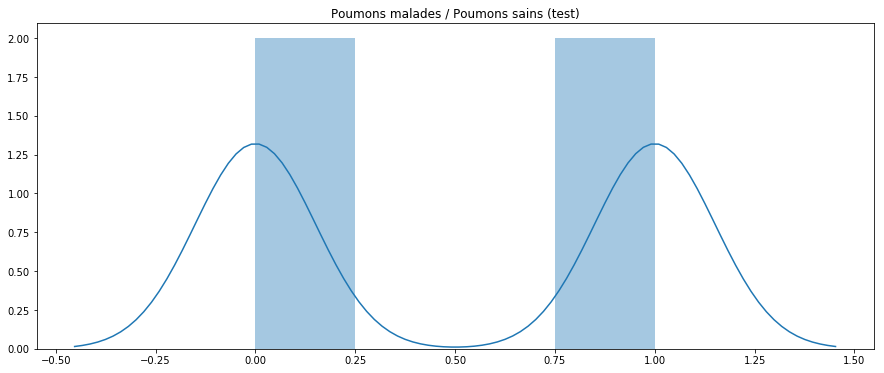

In [15]:
# #QUELQUES POUMONS
# print(val_Y)
# plt.figure(figsize=(10,6))
# plt.title("Poumons malades / Poumons sains")
# arrayX = []
# for y in range(0, 40):
#     if test_Y[y] == 1:
#         seaborn.kdeplot(data=test_X[y], color="r", shade=True)
# # sea1.kdeplot(data=test_Y, shade=True),

# seaborn.distplot(a=val_Y, kde=False)
# plt.figure(figsize=(10,6))
# plt.title("Poumons malades / Poumons sains (train)")

# seaborn.distplot(a=train_Y, kde=False)
plt.figure(figsize=(15,6))
plt.title("Poumons malades / Poumons sains (test)")

seaborn.distplot(a=test_Y, kde=True)

# ______________________________________
# plt.figure(figsize=(10,6))
# plt.title("Poumons sains")

#for y in range(300, 340):
#    if test_Y[y] == 0:
#        seaborn.kdeplot(data=test_X[y], color="b", shade=True)

        
# TOUS LES POUMONS
#plt.figure(figsize=(10,6))
#plt.title("Poumons sains")
#for y in test_Y:
#    if y == 1:
#        for x in test_X:
#            seaborn.kdeplot(data=x, color="r", shade=True)
#plt.figure(figsize=(10,6))
#plt.title("Poumons malades")
#for y in test_Y:
#    if y == 0:
#        for x in test_X:
#            seaborn.kdeplot(data=x, color="b", shade=True)
#seaborn.kdeplot(data=test_Y, shade=True)

# Creation and training step of the model

In [16]:
model = RandomForestClassifier(random_state = 1, n_estimators=100)
model.fit(train_X, train_Y)
scores = cross_val_score(model, val_X, val_Y)
print(str(scores.mean()) + " / " + str(scores.std()))

/home/wkyubi/.local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.16666666666666666 / 0.13608276348795434


# Validation step

In [17]:
scores_preds = cross_val_predict(model, test_X, test_Y)
scores_probas = model.predict_proba(test_X)[:, 1]
print(str(scores_preds.mean()) + " / " + str(scores_preds.std()))

0.485 / 0.4997749493522059


# Test step : Final model accuracy

In [18]:
accuracy = roc_auc_score(test_Y, scores_preds)
print(accuracy)

0.905


## Predictions and model metrics plots

Text(0.5,1,'ROC Curves')

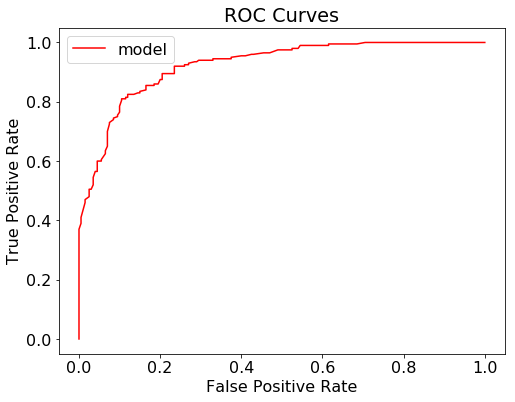

In [19]:
false_positive, true_positive, _ = roc_curve(test_Y, scores_probas)
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 16
plt.plot(false_positive, true_positive, 'r', label = 'model')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

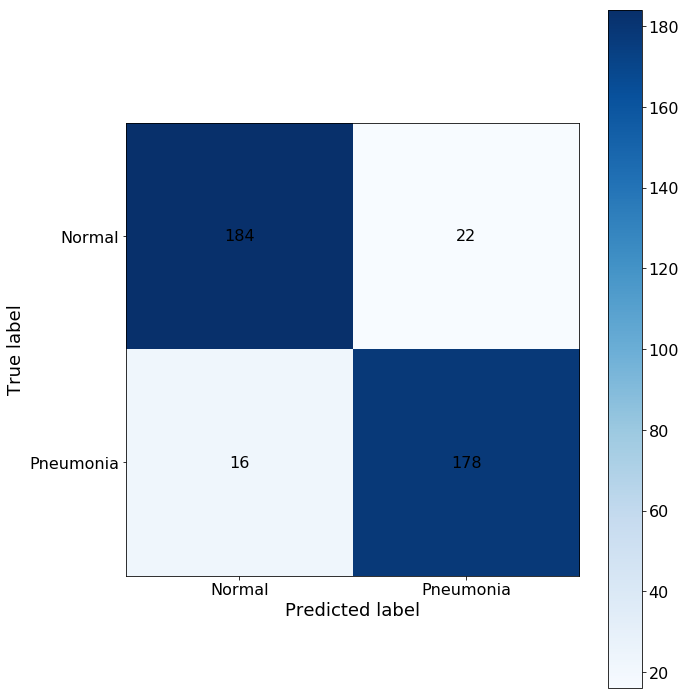

In [20]:
cm = confusion_matrix(test_Y, scores_preds)
classes = ['Normal', 'Pneumonia']
title = 'predictions HeatMap'
plt.figure(figsize = (10, 10))

plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
for i in range(0, len(classes)):
    for j in range(0, len(classes)):
        text = plt.text(i, j, cm[i, j], ha="center", va="center")
plt.ylabel('True label', size = 18)
plt.xlabel('Predicted label', size = 18)
plt.tight_layout()
plt.show()